In [1]:
using DynamicalBilliards
using PyPlot
using Plots
# include("./bounce_maps.jl")
# using .bounce_maps: l_poly
# , square, shelf, simple_nonconv, simple_nonconv_deep, simple_bit, irrsquare, triangle, smallsquare, smalltriangle, thintriangle, thintriangle2, pent, conv, two_conv, irpent, irpent, poly1, poly2, poly3, tworooms, tworoomsgp, tworooms2, tworooms3, hallway, office, concave_quad_1, concave_quad_2, concave_pent, bigpoly


┌ Warning: Package DynamicalBilliards does not have Plots in its dependencies:
│ - If you have DynamicalBilliards checked out for development and have
│   added Plots as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with DynamicalBilliards
│ Loading Plots into DynamicalBilliards from project dependency, future warnings for DynamicalBilliards are suppressed.
└ @ nothing nothing:840


In [2]:
# Environments
# env 1
polygon_n_vx = 5
polygon_boundary_len = 4.0
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_n_vx), r*sin(2π*i/polygon_n_vx)] for i in 1:polygon_n_vx]
polygonver = polygon_vertex(polygon_boundary_len)
# env 2
concave_quad = [[2.5,2.5],[0.0,1.0],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5]]
orthogonal_env = [[5.0, 2.0], [4.0, 2.0], [4.0, 3.0], [5.0, 3.0], [5.0, 5.0], [4.0, 5.0], [4.0, 4.0], [3.0, 4.0], [3.0, 5.0], [2.0, 5.0], [2.0, 4.0], [1.0, 4.0], [1.0, 3.0], [3.0, 3.0], [3.0, 1.0], [5.0, 1.0]]
tangent_bounce_angle = 0.2*pi
angular_vel = -0.1

-0.1

In [3]:
# Simulation construction
# Step 1: construct billiard with Splitter Wall
env_poly = orthogonal_env
bd = Obstacle{Float64}[]
for i in eachindex(env_poly)
  starting = env_poly[i]
  ending = env_poly[mod1(i+1, length(env_poly))]
  w = ending - starting
  normal = [-w[2], w[1]]
  wall = SplitterWall(starting, ending, normal, "wall $i")
  push!(bd, wall)
end
bd = Billiard(bd)
# plot(bd)

# Step 2: Define transmission function and refraction function  
# in our case, we never want the transmission happens (yet)
transmission_p(p) = (φ, pflag, ω) -> begin
    0
end
# the refraction would be our bounce angles (with respect to the normal)
refraction(φ, pflag, ω) = tangent_bounce_angle

# Step 3: Assign the transmission function and refraction to each wall
raywall = RaySplitter(collect(1:length(env_poly)), transmission_p(0), refraction)
# Step 4: Create a particle with initial x, initial y, initial heading angle, angular velocity |w| = 1/r
mp = MagneticParticle(2, 3.5, 2, angular_vel)
xt, yt, vxt, vyt, tt = timeseries(mp, bd, 10, (raywall,))


[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
v

([2.0, 1.99584, 1.9917, 1.98756, 1.98343, 1.97931, 1.9752, 1.97109, 1.967, 1.96292  …  2.38377, 2.38872, 2.39366, 2.39859, 2.40352, 2.40843, 2.41334, 2.41823, 2.42312, 2.42687], [3.5, 3.5091, 3.51819, 3.5273, 3.53641, 3.54552, 3.55463, 3.56375, 3.57288, 3.582  …  3.07635, 3.06766, 3.05897, 3.05027, 3.04156, 3.03286, 3.02414, 3.01542, 3.0067, 3.0], [-0.416147, -0.415237, -0.414327, -0.413417, -0.412506, -0.411595, -0.410684, -0.409772, -0.408859, -0.407946  …  0.49542, 0.494551, 0.493682, 0.492812, 0.491942, 0.491071, 0.490199, 0.489328, 0.488455, -0.587785], [0.909297, 0.909713, 0.910128, 0.910542, 0.910955, 0.911367, 0.911778, 0.912188, 0.912597, 0.913006  …  -0.868653, -0.869148, -0.869643, -0.870136, -0.870628, -0.87112, -0.87161, -0.8721, -0.872589, 0.809017], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  11.1448, 11.1548, 11.1648, 11.1748, 11.1848, 11.1948, 11.2048, 11.2148, 11.2248, 11.2325])

[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, 1

[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-0.0, 1.0]
velocity: [0.187785, -0.98221]
0.982210109407072
0.18890679692865955
[-0.0, 1.0]
velocity: [0.187785, -0.98221]
0.982210109407072
0.18890679692865955
[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-0.0, 1.0]
velocity: [0.187785, -0.98221]
0.982210109407072
0.18890679692865955
[-0.0, 1.0]
velocity: [0.187785, -0.98221]
0.982210109407072
0.18890679692865955
[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-0.0, -1.0]
velocity: [-0.266147, 0.963932]
0.9639324983607248
0.26939347502798766
[-1.0, 0.0]
velocity: [0.495423, -0.868652]
0.49542263613030996
1.0524750201505844
change sign for phi n
[-1.0, 0.0]
velocity: [0.495423, -0.868652]
0.49542263613030996
1.0

[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-1.0, 0.0]
velocity: [0.465065, -0.885277]
0.4650647729971818
1.087088550027811
change sign for phi n
[-1.0, 0.0]
velocity: [0.465065, -0.885277]
0.4650647729971818
1.087088550027811
change sign for phi n
[1.0, 0.0]
velocity: [-0.872964, -0.487785]
0.8729636576891207
0.5095509047942492
[1.0, 0.0]
velocity: [-0.872964, -0.487785]
0.8729636576891207
0.5095509047942492
[-1.0, 0.0]
velocity: [0.872964, 0.487785]
0.8729636576891208
0.509550904794249
[-1.0, 0.0]
velocity: [0.872964, 0.487785]
0.8729636576891208
0.509550904794249
[1.0, 0.0]
velocity: [-0.872964, -0.487785]
0.8729636576891207
0.5095509047942492
[1.0, 0.0]
velocity: [-0.872964, -0.487785]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570

[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, -1.0]
velocity: [-0.366147, 0.930557]
0.9305570880319596
0.37486492405337396
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, 1.0]
velocity: [0.487785, -0.872964]
0.8729636576891208
0.509550904794249
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.0]
velocity: [-0.487785, 0.872964]
0.8729636576891207
0.5095509047942492
[-0.0, -1.

ffmpeg version 3.3.3 Copyright (c) 2000-2017 the FFmpeg developers
  built with Apple LLVM version 8.1.0 (clang-802.0.42)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.3.3 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --enable-videotoolbox --disable-lzma --enable-vda
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.100 / 57.  6.100
  libavfilter     6. 82.100 /  6. 82.100
  libavresample   3.  5.  0 /  3.  5.  0
  libswscale      4.  6.100 /  4.  6.100
  libswresample   2.  7.100 /  2.  7.100
  libpostproc    54.  5.100 / 54.  5.100
Input #0, image2, from './orthogonal_movie/orthogonal_%d.png':
  Duration: 00:00:05.05, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 720x720 [SAR 3937:3937

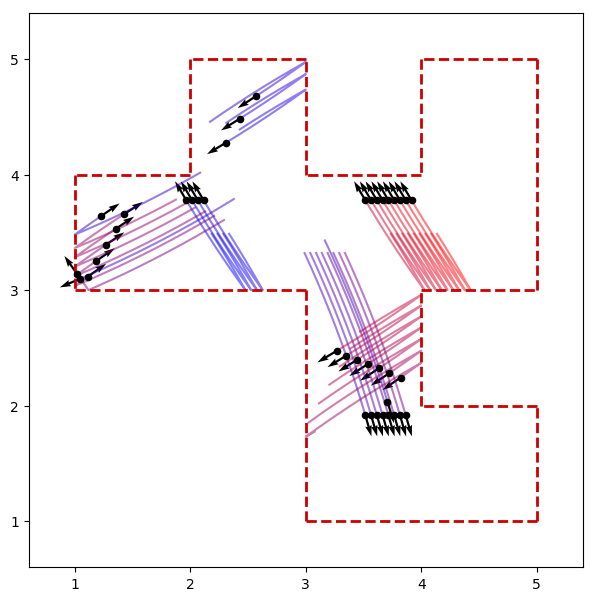

frame=  101 fps= 43 q=-1.0 Lsize=     181kB time=00:00:04.90 bitrate= 302.7kbits/s speed=2.09x    
video:179kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.994182%
[libx264 @ 0x7fef95010800] frame I:1     Avg QP:19.00  size: 13673
[libx264 @ 0x7fef95010800] frame P:52    Avg QP:24.95  size:  2326
[libx264 @ 0x7fef95010800] frame B:48    Avg QP:28.35  size:  1005
[libx264 @ 0x7fef95010800] consecutive B-frames: 30.7% 15.8% 17.8% 23.8%  5.0%  0.0%  6.9%  0.0%  0.0%
[libx264 @ 0x7fef95010800] mb I  I16..4: 32.0% 56.8% 11.2%
[libx264 @ 0x7fef95010800] mb P  I16..4:  0.1%  0.3%  0.1%  P16..4:  2.0%  1.2%  1.4%  0.4%  0.2%    skip:94.3%
[libx264 @ 0x7fef95010800] mb B  I16..4:  0.0%  0.2%  0.0%  B16..8:  3.0%  1.4%  0.7%  direct: 0.2%  skip:94.5%  L0:51.5% L1:36.5% BI:12.0%
[libx264 @ 0x7fef95010800] 8x8 transform intra:60.6% inter:8.5%
[libx264 @ 0x7fef95010800] direct mvs  spatial:91.7% temporal:8.3%
[libx264 @ 0x7fef95010800] coded y,uvDC,uvAC intra: 7.0%

In [4]:
# Simulate multi-particle (animation)
N = 40
cs = [(i/N, 0, 1 - i/N, 0.5) for i in 1:N]
ps = [MagneticParticle(2+0.05*i, 3.5, 2, angular_vel) for i in 1:N]
animate_evolution(ps, bd, 5.0, (raywall,), colors = cs, tailtime = 1.5, savename = "./orthogonal_movie/orthogonal");

In [5]:
# Using Julia plots to visualize fade out path
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_n_vx), r*sin(2π*i/polygon_n_vx)] for i in 1:(polygon_n_vx+1)]
polygonver = polygon_vertex(polygon_boundary_len)
concave_quad = [[2.5,2.5],[0.0,1.0],[-2.5,2.5],[-2.5,-2.5],[2.5,-2.5], [2.5,2.5]]
orthogonal_env = [[5.0, 2.0], [4.0, 2.0], [4.0, 3.0], [5.0, 3.0], [5.0, 5.0], [4.0, 5.0], [4.0, 4.0], [3.0, 4.0], [3.0, 5.0], [2.0, 5.0], [2.0, 4.0], [1.0, 4.0], [1.0, 3.0], [3.0, 3.0], [3.0, 1.0], [5.0, 1.0], [5.0, 2.0]]

boundary_x = [orthogonal_env[i][1] for i in eachindex(orthogonal_env)]
boundary_y = [orthogonal_env[i][2] for i in eachindex(orthogonal_env)]
Plots.plot(boundary_x, boundary_y, color = :red, linewidth = 3)
alphas = range(0, 1, length = length(xt))
Plots.plot!(xt, yt, seriesalpha = alphas, aspect_ratio = :equal, axis = nothing, ticks = false, foreground_color = :white, color = :blue, linewidth = 2, legend = false)
Plots.scatter!([xt[1]], [yt[1]], color = :black)
Plots.savefig("./billiard_18.png")

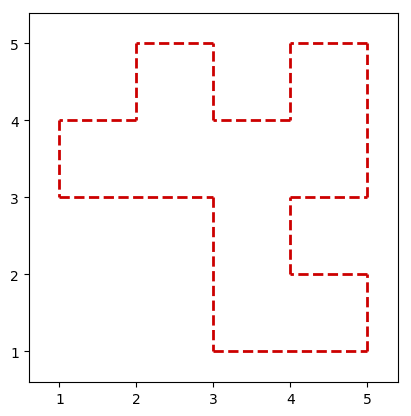

In [6]:
DynamicalBilliards.plot(bd)
DynamicalBilliards.plots_plot(bd, xt, yt, "./billiard_19.png")

1234567891011121314151617done

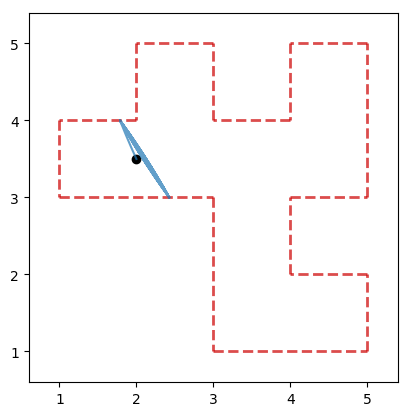

In [7]:
DynamicalBilliards.plot(bd)
fig = PyPlot.plot(xt, yt)
alphas = range(0, 1, length = length(xt))
i = 0
for l in gca()[:lines]
    l[:set_alpha](0.7)
    i = i+1
    print(i)
end
PyPlot.scatter(xt[1], yt[1], color = "black")
PyPlot.savefig("./billiard_5.png")
print("done")